In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

glass = pd.read_csv('./glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [2]:
glass.Type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

In [3]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

0    163
1     51
Name: household, dtype: int64

In [4]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household

In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[3.11517927]]), array([-6.00934605]))

Text(0, 0.5, 'household')

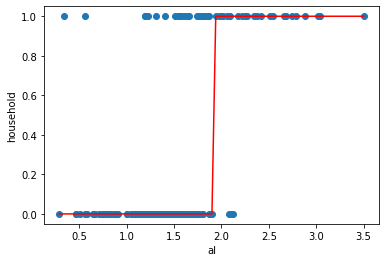

In [6]:
glass.sort_values( by = 'Al', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [7]:
logreg.predict_proba(X)[:15]

array([[0.9939759 , 0.0060241 ],
       [0.99296771, 0.00703229],
       [0.98949363, 0.01050637],
       [0.98949363, 0.01050637],
       [0.98811597, 0.01188403],
       [0.98614074, 0.01385926],
       [0.98614074, 0.01385926],
       [0.98526292, 0.01473708],
       [0.9817376 , 0.0182624 ],
       [0.98117062, 0.01882938],
       [0.98058638, 0.01941362],
       [0.97806663, 0.02193337],
       [0.97738831, 0.02261169],
       [0.9752281 , 0.0247719 ],
       [0.9752281 , 0.0247719 ]])

In [8]:
# Store the predicted probabilities of class 1.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [9]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1,0,0.006024
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,1,0.007032
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,0,0.011884
...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1,0.935956
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1,0.950845
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1,0.967657
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1,0.969552


Text(0, 0.5, 'household')

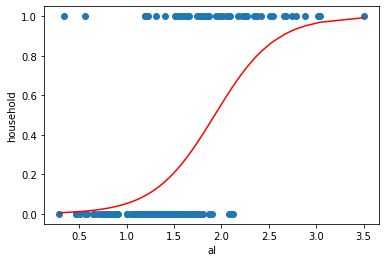

In [10]:
# Plot the predicted probabilities.
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [11]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_true=y, y_pred=pred)
cm

array([[160,   3],
       [ 25,  26]], dtype=int64)

In [12]:
Accuracy = (cm[0,0]+ cm[1,1])/ (np.sum(cm))
Accuracy

0.8691588785046729

In [13]:
Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
Precision

0.896551724137931

In [14]:
Recall = (cm[1,1])/ (np.sum(cm[1,:]))
Recall

0.5098039215686274

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_true=y, y_pred=pred)

0.8691588785046729

In [16]:
precision_score(y_true=y, y_pred=pred)

0.896551724137931

In [17]:
recall_score(y,pred)

0.5098039215686274

In [18]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [19]:
# Check out the dataset and our target values
df = pd.read_csv("iris.csv")
print(df['Name'].value_counts())
df.head(5)

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Name, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


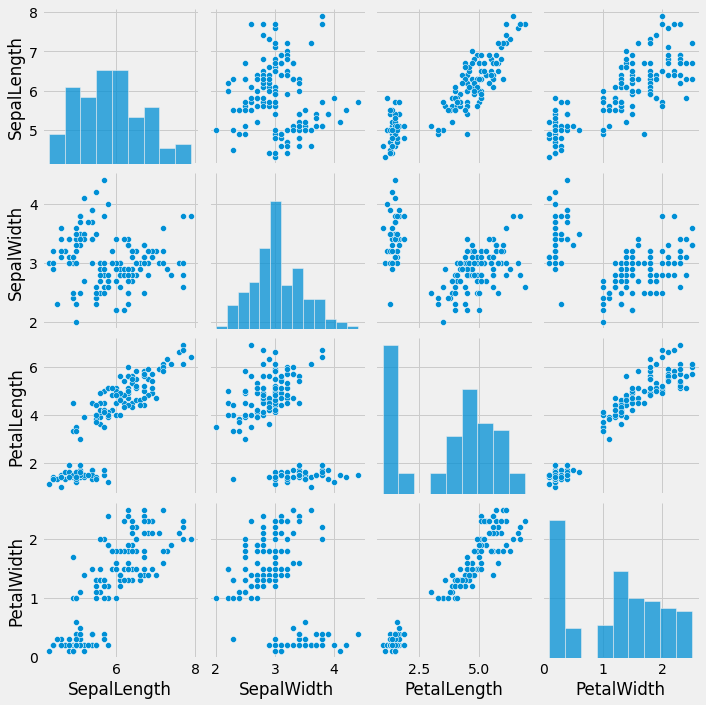

In [20]:
cols = df.columns[:-1]
sns.pairplot(df[cols])

In [21]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

In [22]:
pd.DataFrame(X_scaled, columns=cols).describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [23]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(n_clusters=2)

In [24]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [25]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.6294675561906644

In [26]:
df['label'] = labels
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


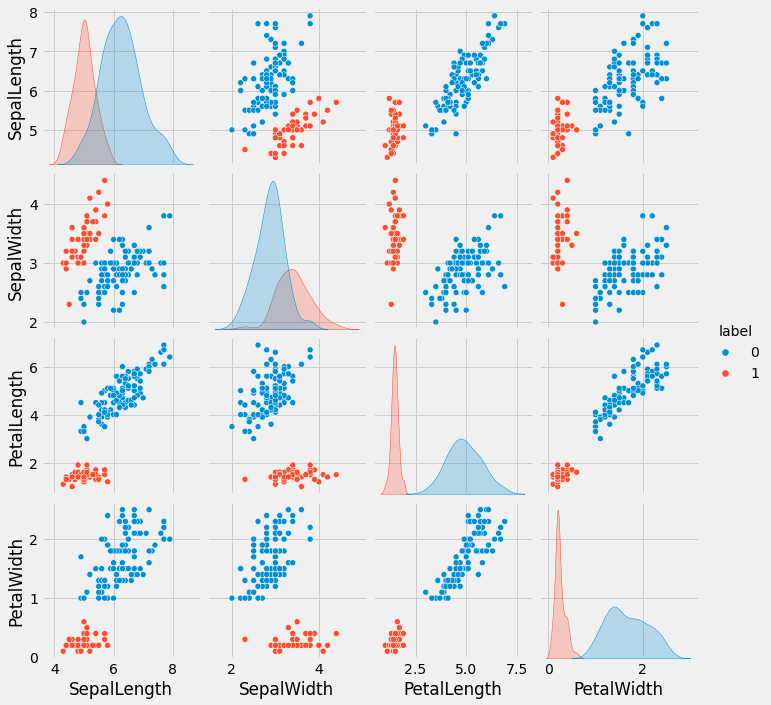

In [27]:
cols = df.columns[:-2]
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='label')

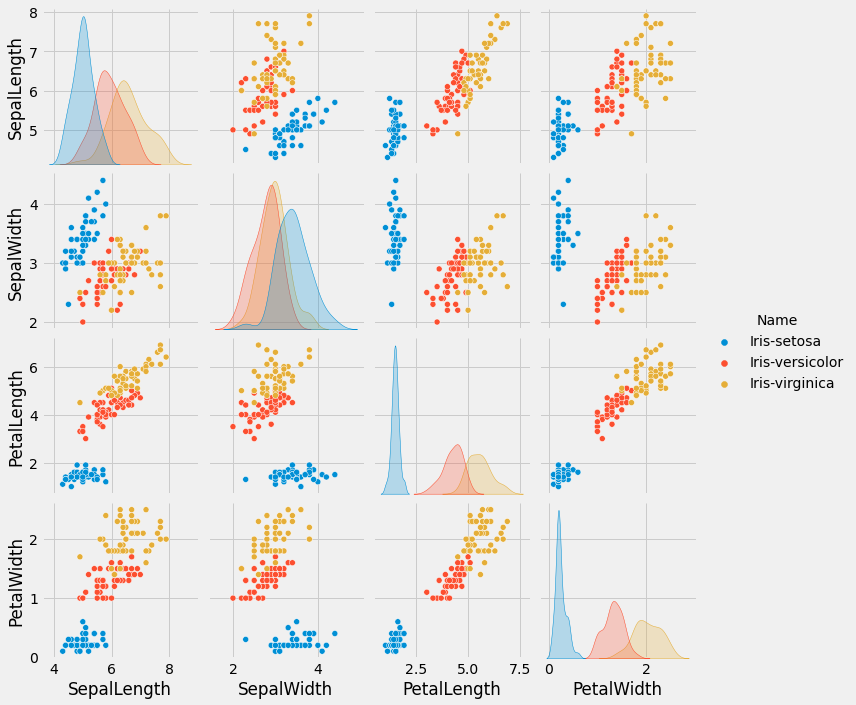

In [28]:
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='Name')

### Practice questions:
1. Repeat the above exercise for different values of k
 - How do the inertia and silhouette scores change?
 - What if you don't scale your features?
 - Is there a 'right' k? Why or why not?


2. Repeat the following exercise for food nutrients dataset


In [29]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(n_clusters=3)

In [30]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [31]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.5043188549150884

In [32]:
df['label'] = labels
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


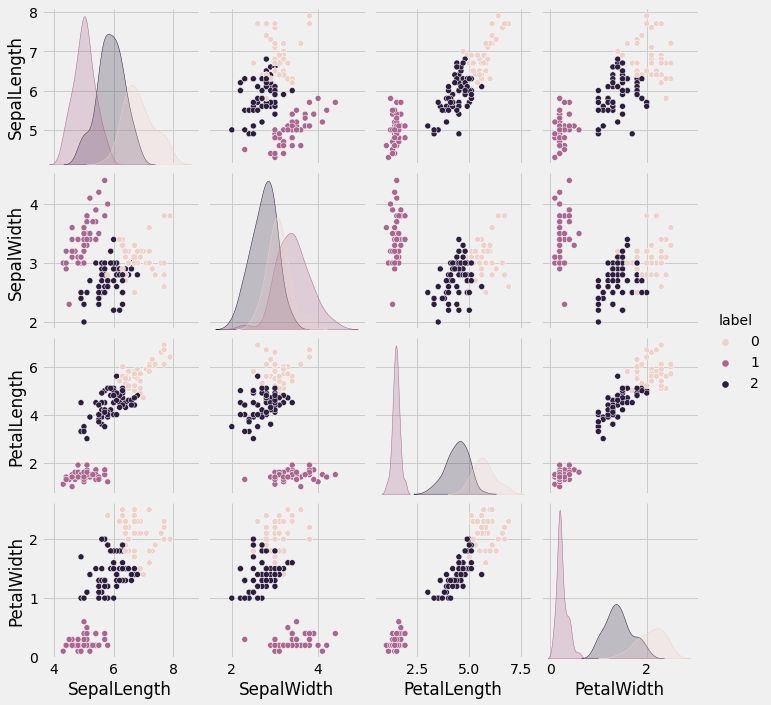

In [33]:
cols = df.columns[:-2]
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='label')

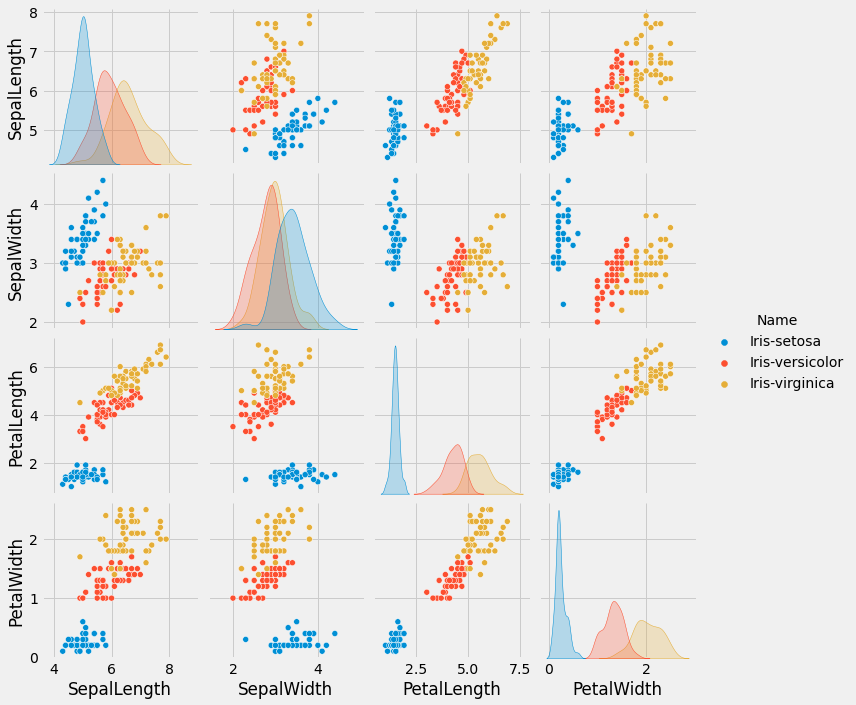

In [34]:
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='Name')

Inertia and Silhouette Scores in K-Means Clustering:

Inertia: Inertia is a measure of how compactly the clusters are formed. It is the sum of squared distances between data points and their assigned cluster centers. As the number of clusters (k) increases, inertia generally decreases because smaller clusters are formed. However, there is an elbow point where the reduction in inertia becomes less significant.

Silhouette Score: The silhouette score measures how well-separated the clusters are. It ranges from -1 to 1, where a higher score indicates better-defined clusters. Silhouette scores closer to 1 suggest well-separated clusters. Silhouette scores are higher when the clusters are dense and well-separated.

Relationship: In general, as k increases, inertia tends to decrease, and silhouette scores may increase. However, these metrics alone do not determine the optimal k. It's common to use an elbow method for inertia and examine silhouette scores to find a balance between compactness and separation.

Scaling Features in K-Means:

Importance of Scaling: Feature scaling is important in K-means clustering because the algorithm is distance-based. Features with larger scales can dominate the calculation of distances, leading to biased cluster assignments. Scaling ensures that all features contribute equally to the clustering process.

Impact of Not Scaling: If you don't scale your features, K-means may produce suboptimal results. Clusters might be influenced more by features with larger scales, and the overall structure of the data may be distorted.

Determining the 'Right' K:

Elbow Method: The elbow method involves plotting the inertia as a function of the number of clusters (k) and identifying the "elbow" where the reduction in inertia slows down. The optimal k is often considered the point where adding more clusters provides diminishing returns in terms of inertia reduction.

Silhouette Method: Silhouette scores help evaluate how well-separated the clusters are. A higher silhouette score indicates better-defined clusters. The optimal k is often associated with the highest silhouette score.

No Universal 'Right' K: There is no universal "right" k, and it depends on the context of the data and the goals of the analysis. Different methods may suggest different optimal k values. It's also important to consider domain knowledge and the specific insights you are seeking.

Experimentation and Validation: Experimenting with different k values and validating the results using multiple metrics can help in selecting the most suitable k for a given dataset. It's often a trade-off between the desire for well-separated clusters and the interpretability of the clusters.

In [35]:
nutrients = pd.read_csv('nutrients.csv')
nutrients.head()

,"""Name""","""Energy""","""Protein""","""Fat""","""Calcium""","""Iron"""
0,"""Braised beef""",340,20,28,9,2.6
1,"""Hamburger""",245,21,17,9,2.7
2,"""Roast beef""",420,15,39,7,2.0
3,"""Beefsteak""",375,19,32,9,2.6
4,"""Canned beef""",180,22,10,17,3.7


Index(['"Name"', '"Energy"', '"Protein"', '"Fat"', '"Calcium"'], dtype='object')


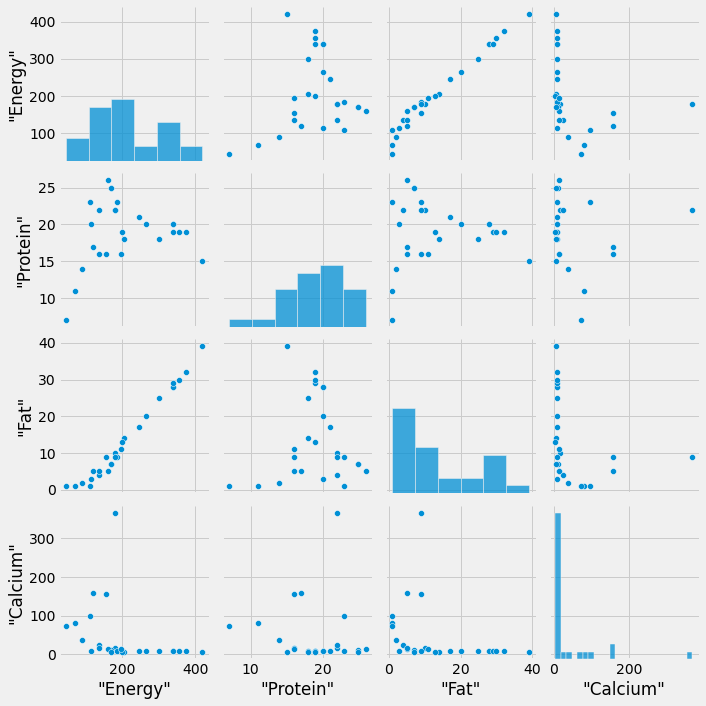

In [36]:
cols = nutrients.columns[:-1]
print(cols)
sns.pairplot(nutrients[cols])

In [40]:
cols = cols.delete(0)
print(cols)
X_scaled = preprocessing.MinMaxScaler().fit_transform(nutrients[cols])

Index(['"Energy"', '"Protein"', '"Fat"', '"Calcium"'], dtype='object')


In [41]:
pd.DataFrame(X_scaled, columns=cols).describe()

,"""Energy""","""Protein""","""Fat""","""Calcium"""
count,27.000000,27.000000,27.000000,27.000000
mean,0.433086,0.631579,0.328460,0.107632
std,0.269887,0.223773,0.296238,0.215564
min,0.000000,0.000000,0.000000,0.000000
25%,0.240000,0.500000,0.105263,0.011050
50%,0.360000,0.631579,0.210526,0.011050
75%,0.633333,0.789474,0.565789,0.073204
max,1.000000,1.000000,1.000000,1.000000


In [42]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(n_clusters=2)

In [43]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [44]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.4665764109560025

In [45]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(n_clusters=3)

In [46]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [53]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.415738457086301

In [54]:
nutrients['label'] = labels
nutrients.head()

,"""Name""","""Energy""","""Protein""","""Fat""","""Calcium""","""Iron""",label
0,"""Braised beef""",340,20,28,9,2.6,2
1,"""Hamburger""",245,21,17,9,2.7,0
2,"""Roast beef""",420,15,39,7,2.0,2
3,"""Beefsteak""",375,19,32,9,2.6,2
4,"""Canned beef""",180,22,10,17,3.7,0
